# Sort Running Time
- Depends on input (e.g. already started)
- Depends on input size(6 elements vs. 6e9)
    - parameterize running time by input size
- We want upper bounds of running time (at most how much time will it take?)
    - guarantee for user

# Evaluation Utilities

In [1]:
import random, time
import matplotlib.pyplot as plt

# Make sure sort works
def validate_sort(sort):
    arrs = [[random.randint(0, 100) for _ in range(100)] for _ in range(1000)]
    assert all([sort(arr)==sorted(arr) for arr in arrs])

# Plot complexity of the runtime
def complexity(sort, label, accuracy=10, lenRange=50, numPlots=4):
    for _ in range(numPlots):
        avgs = []
        arrs = [[[random.randint(0, 100) for _ in range(5*i)] for _ in range(accuracy)] for i in range(lenRange)]

        for j in range(lenRange):
            avg = 0
            for k in range(accuracy):
                t0 = time.time()
                x = sort(arrs[j][k])
                t1 = time.time()
                avg += (t1-t0)/accuracy
            avgs.append(avg)

        plt.plot(avgs, label=label)

# Insertion Sort

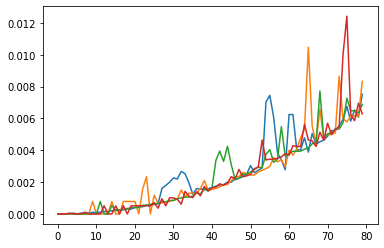

In [2]:
def insertion_sort(arr):
    if len(arr) <= 1:
        return arr
    for j in range(1, len(arr)):
        key = arr[j]
        i = j-1
        while i>=0 and arr[i]>key:
            arr[i], arr[i+1] = arr[i+1], arr[i]
            i -= 1
    return arr
validate_sort(insertion_sort)
complexity(insertion_sort, '', 20, 80)

# Kinds of analyses
- Worst-case (usually)
    - $T(n) =$ max time on any input of size $n$
- Average-case (sometimes)
    - $T(n) =$ expected time over all inputs of size $n$
    - This requires the assumption of the statistical distrubution of the probability of each input of size $n$. Usually, this distribution is assumed uniform.
- Best-case (BOGUS)
    - Cheating :( because if a slow algorithm is fast on one specific input, then one could show that the "best-case" is that, without showing how slow it actually is on either worst-case or average-case

# Asymptotic Analysis
1. Ignore machine-dependent constants
2. Look at <ins>growth</ins> of $T(n)$ as $n \rightarrow \infty$

# Asymptotic notation
$\Theta$-notation
- Drop low-order terms
- Ignore leading constants

Ex. $3n^3+41n^2+98n-2=\Theta (n^3)$

As $n \rightarrow \infty$, a $\Theta (n^2)$ alg always beats a $\Theta (n^3)$ alg.

**The growth of an algorithm is almost never determined by the machine or its computational abilities**

Note that when $n$ is small, $n^3$ can be smaller than $n^2$, so asymptotic growth will not necessarily work for very low $n$.

## Insertion Sort Analysis
- Worst-case: input is reverse sorted


- $T(n)=\sum_{j=1}^{n-1} \Theta (j) = \Theta (n^2)$ (arithmetic series)

# Merge Sort
1. If $n=1$, return array
2. Cut array in half and recursively sort both
3. Merge the sorted halves, return new array

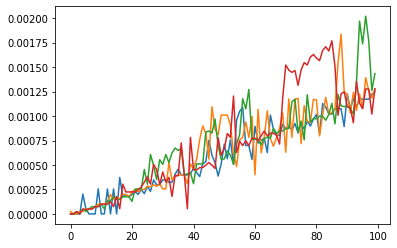

In [3]:
import math
import sys
sys.setrecursionlimit(150000)

def mergesort(arr):
    # 1.
    if len(arr) <= 1:
        return arr
    
    #2. 
    half1 = mergesort(arr[:math.ceil(len(arr)/2)])
    half2 = mergesort(arr[math.ceil(len(arr)/2):])
    
    #3. 
    arr = []
    while half1 or half2:
        if not half1:
            arr += half2
            break
        elif not half2: 
            arr += half1
            break
        if half1[0] < half2[0]:
            arr.append(half1.pop(0))
        else:
            arr.append(half2.pop(0))
    
    return arr

validate_sort(mergesort)
complexity(mergesort, '', 40, 100)

# Mergesort Analysis (recurrence of mergesort)
- Worst-case: same—input is reverse sorted


- If $n=1, T(n)=$ time it takes for step 1 $=\Theta (1)$
- If $n>1, T(n)=$ sum of time it takes for steps 2 and 3 $=2T(\frac {n}{2})+\Theta (n)$
<img src='mergesort_proof.jpg' align='left'>

- $T(n)=\Theta (nlog(n))$

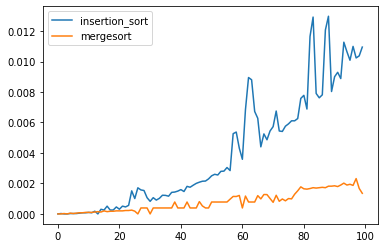

In [4]:
complexity(insertion_sort, 'insertion_sort', 40, 100, 1)
complexity(mergesort, 'mergesort', 40, 100, 1)
plt.legend()